# Decision Trees

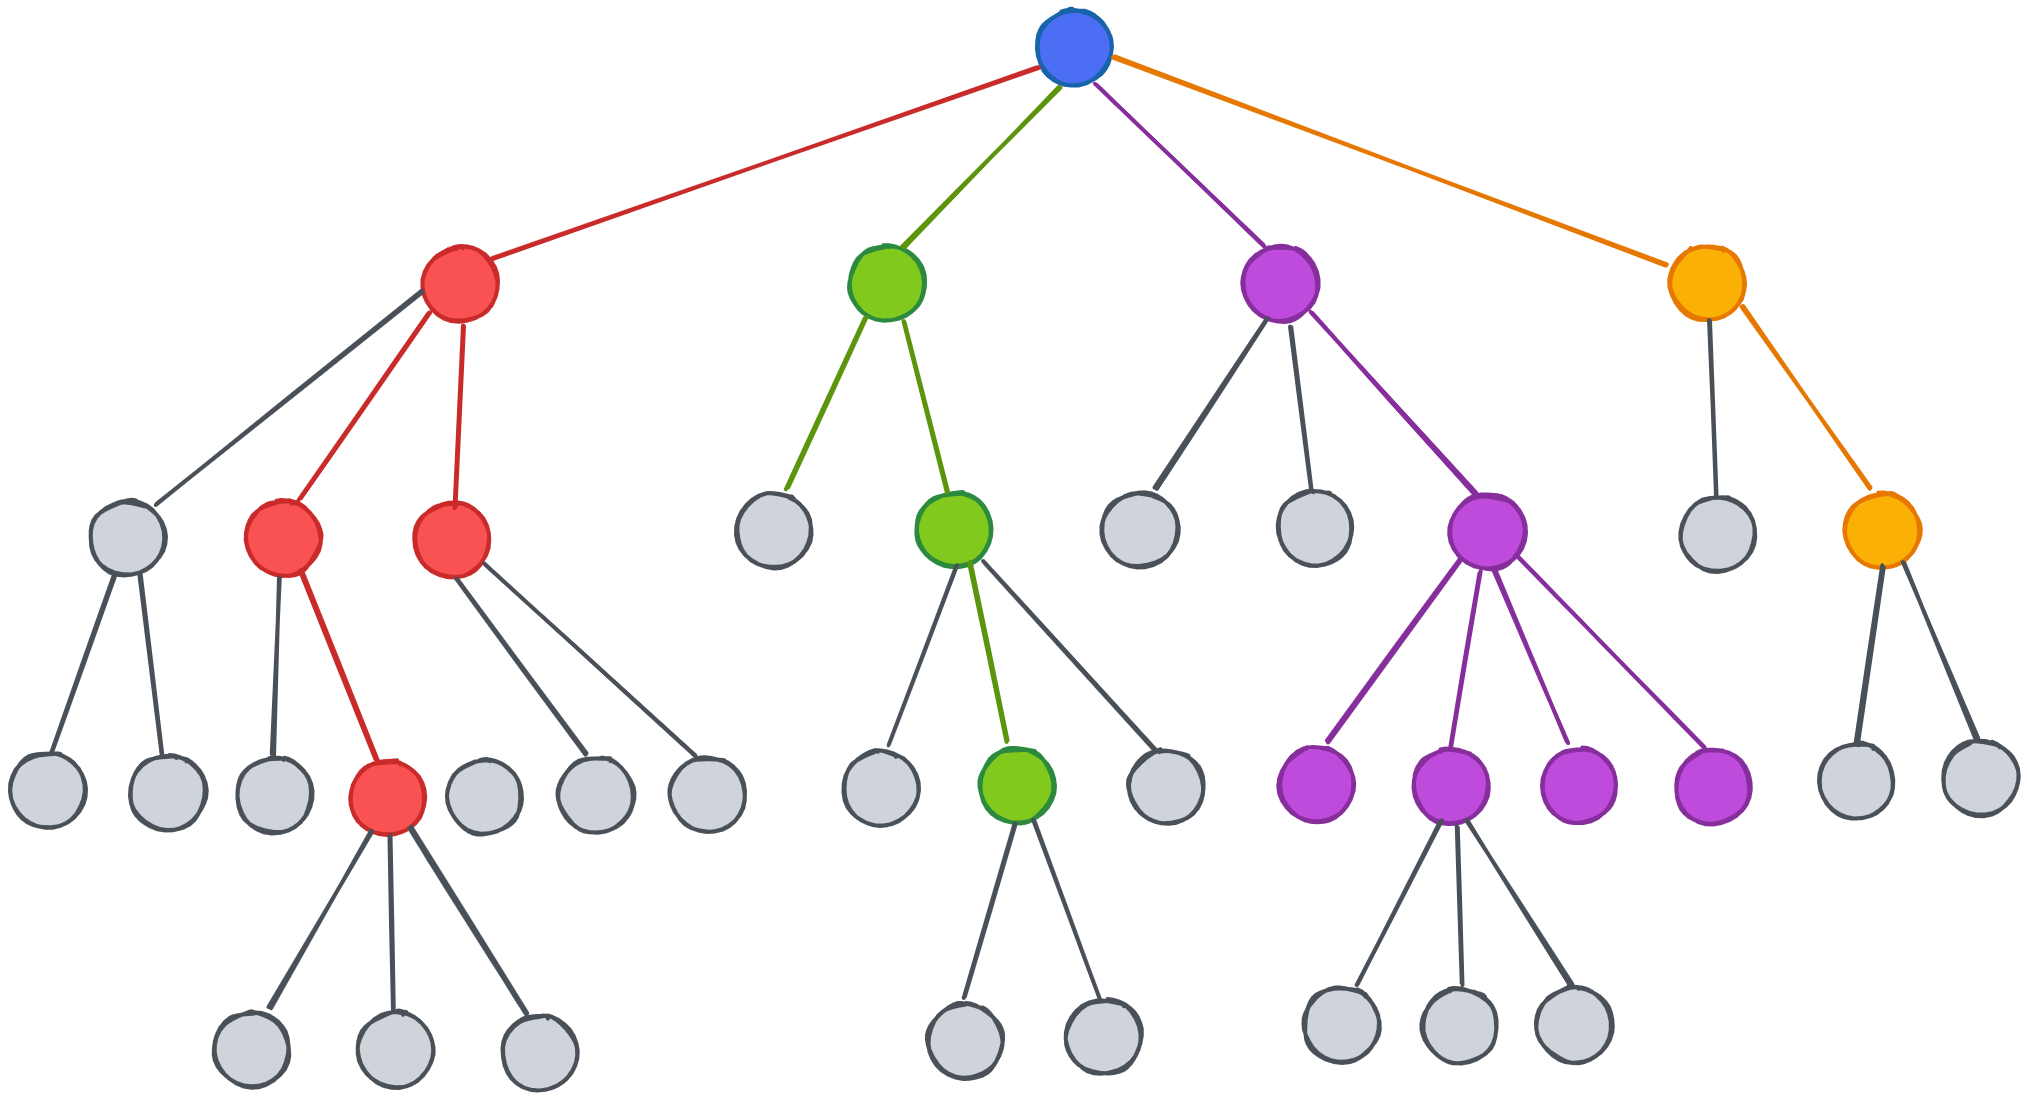

Decision trees are another form of nonparametric models, where the general idea is to perform classification or regression tasks by enforcing simple rules inferred from training data. 

Here are some advantages of decision trees:
* Simple to understand/interpret, unlike black box models (neural networks, etc.)
* No feature engineering or data preparation required
    * Able to handle missing values and outliers
* Can handle numerical and categorical data

Decision trees are a strong choice for predictive modeling due to these advantages. They are simple yet effective. 

However, it is important to note some of their disadvantages:
* Easy to overfit without setting a maximum depth, pruning, etc.
* Difficult to capture complex relationships between features and the target
* Can become unstable when there are small variations in data. 